# Assignment 2 - Machine Learning Basics

## *William Wei-Jung Huang*
Netid:  *wh132*

Github link: *https://gitlab.oit.duke.edu/ids705-sp19/williamhuang*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**
1. With the extremely large samples, our model is unlikely to overfit even it's a flexible model. Additionally, a more flexible model tends to have less bias. 
2. We should use an inflexible model given its small number of observations. With a flexible model, it's likely to have overfitting problems. It also implies a great increase in variance and a small decrease in bias.
3. It's more appropriate to use a flexible model to capture the non-linear relationship.
4. We tend to use an inflexible model as a flexible model will catch too much noise in the data given its high variance of the error terms. 

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**
<br> **(a)** 
(i) It's a regression problem because the response variable is continuous. (ii) inference problem (iii) n=500, p=4
<br> **(b)**
(i) It's a classification problem as the response variable is discrete. (ii) predcition problem (iii)n=20, p=14 
<br> **(c)**
(i) It's a regression problem because the response variable is continuous. (iii) prediction problem (iii)n=52,p=4


# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [1]:
# (a) Write your own kNN classifier
import numpy as np
import pandas as pd

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
    
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y

    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for i in range(x.shape[0]):
            dist = np.sum(np.sqrt(np.square(self.x - x[i])), axis = 1)
            dist_df = pd.DataFrame(dist)
            feature_df = pd.DataFrame(self.y)
            mix = pd.concat([dist_df, feature_df],axis=1)
            mix.columns = ['dist', 'feature']
            mix = mix.sort_values(by = ['dist'],ascending = True)
            
        #select K closest points
            avg_pred = pd.Series.mean(mix.iloc[:k, 1])
            if avg_pred > 0.5:
                avg_pred = 1
            else:
                avg_pred = 0
            y_hat.append(avg_pred)
        # Return the estimated targets
        return y_hat

    
    
# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [2]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each
#(b)
import time
xTrainLow = np.genfromtxt("data/A2_X_train_low.csv", delimiter=",")
yTrainLow = np.genfromtxt("data/A2_y_train_low.csv", delimiter=",")
xTestLow = np.genfromtxt("data/A2_X_test_low.csv", delimiter=",")
yTestLow = np.genfromtxt("data/A2_y_test_low.csv", delimiter=",")

xTrainHigh = np.genfromtxt("data/A2_X_train_high.csv", delimiter=",")
yTrainHigh = np.genfromtxt("data/A2_y_train_high.csv", delimiter=",")
xTestHigh = np.genfromtxt("data/A2_X_test_high.csv", delimiter=",")
yTestHigh = np.genfromtxt("data/A2_y_test_high.csv", delimiter=",")

#(c)
myKnn = Knn()
t0 = time.time() 
myKnn.fit(xTrainLow,yTrainLow)
yHatLow = myKnn.predict(xTestLow,5)
accuracyLow = accuracy(yTestLow,yHatLow)
t1 = time.time() 


t2 = time.time()
myKnn.fit(xTrainHigh,yTrainHigh)
yHatHigh = myKnn.predict(xTestHigh,5)
accuracyHigh = accuracy(yTestHigh,yHatHigh)
t3 = time.time()

print("Accuracy for Low Dimension: {}, computation time: {}".format(accuracyLow, t1-t0))
print("Accuracy for High Dimension: {}, computation time: {}".format(accuracyHigh, t3-t2))

Accuracy for Low Dimension: 0.921, computation time: 1.9499173164367676
Accuracy for High Dimension: 0.992, computation time: 6.204225063323975


In [3]:
#(d)
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5) 
t0 = time.time() 
model.fit(xTrainLow,yTrainLow)
yHatLow = model.predict(xTestLow)
accuracyLow = accuracy(yTestLow,yHatLow)
t1 = time.time() 

t2 = time.time() 
model.fit(xTrainHigh,yTrainHigh)
# Test on low dimensional test set
yHatHigh = model.predict(xTestHigh)
# Compute accuracy
accuracyHigh = accuracy(yTestHigh,yHatHigh)
t3 = time.time() # Get time after computation

print("Accuracy: {}, Time [sec]: {}  (low-dimensional)".format(accuracyLow,t1-t0))
print("Accuracy: {}, Time [sec]: {} (high-dimensional)".format(accuracyHigh,t3-t2))

Accuracy: 0.925, Time [sec]: 0.014351129531860352  (low-dimensional)
Accuracy: 0.993, Time [sec]: 0.2236647605895996 (high-dimensional)


The accuracies of my KNN classifier and scikit-learn KNeighborsClassifier are almost identical on these datasets. However, the speed is significantly different. The speed of scikit-learn KNeighborsClassifier is much faster than mine.

**(e)**
As it's very computationally intensive, the problem will be what if the dataset is extremely large. The algorithm will then take very long time to derive the result. Therefore, in some real-world settings, it might not be deployable becuase it takes too long for users to get the results back.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [9]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [10]:
#(a)
test_point = np.array([0, 0, 0])
dist = np.sqrt(np.sum(np.square(X - test_point),axis=1))
dist_df = pd.DataFrame(dist)
feature_df = pd.DataFrame(y)
mix_df = pd.concat([dist_df, feature_df], axis = 1)
mix_df.columns = ['dist', 'feature']
mix_df = mix_df.sort_values(by = ['dist'], ascending = True)

#making the table
X_df = pd.DataFrame(X)
answer_table = pd.concat([X_df, mix_df], axis = 1)
answer_table.columns = ['x1', 'x2', 'x3', 'dist', 'feature']
answer_table.index.name = 'Obs.'
print(answer_table)

      x1  x2  x3      dist feature
Obs.                              
0      0   3   0  3.000000       r
1      2   0   0  2.000000       r
2      0   1   3  3.162278       r
3      0   1   2  2.236068       b
4     -1   0   1  1.414214       b
5      1   1   1  1.732051       r


In [11]:
#(b) k=1
# create dummy variables: r = 0, b = 1
mix_df['dummy'] = pd.Series([1,0,0,1,0,0], index = mix_df.index)
#mix_df.sort_values(by = ['dist'])
def k_pred(x, k):
    avg_pred = pd.Series.mean(x.iloc[:k, 2])
    if avg_pred > .5: 
        prediction = 'Blue'
    else: 
        prediction = 'Red'
    return prediction

k_pred(mix_df, 1)

'Blue'

Based on the table in (a), we can see the closest point is (-1,0,1), which is blue. Therefore, we should classify it as blue under the condition of k = 1.

In [12]:
#(c) k=3
k_pred(mix_df, 3)

'Red'

Based on the table in (a), we can see the three closest points are "red","red" and "blue". As the majority of closest points are red, we should classify it as red under the condition of k=3.

**(d)** 
The decision boundary will be smoother by increasing the value of k. Since the decision boundary is highly non-linear, we should choose a smaller k value.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [4]:
#(a)
from sklearn.datasets import make_moons
dataset = make_moons(n_samples=1000, shuffle=True, noise=0.35, random_state=1)

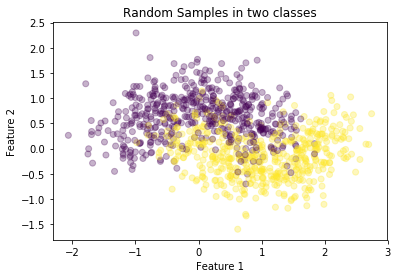

In [5]:
#(b)
import matplotlib.pyplot as plt

x_val = []
for i in range(dataset[0].shape[0]):
    x_val.append(dataset[0][i][0])
y_val = []
for i in range(dataset[0].shape[0]):
    y_val.append(dataset[0][i][1])
    
plt.scatter(x_val, y_val, c=dataset[1], alpha=0.3)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random Samples in two classes")
plt.show()

In [6]:
#(c)
#create subset1
np.random.seed(0)
randa = np.random.choice(1000,100)
subset_1_x = dataset[0][randa]
subset_1_y = dataset[1][randa]

#create subset2
np.random.seed(20)
randb = np.random.choice(1000,100)
subset_2_x = dataset[0][randb]
subset_2_y = dataset[1][randb]

#create subset3
np.random.seed(779)
randc = np.random.choice(1000,100)
subset_3_x = dataset[0][randc]
subset_3_y = dataset[1][randc]

#subset1 and K=1,25,50
knn1_1 = KNeighborsClassifier(n_neighbors=1) 
knn1_1.fit(subset_1_x,subset_1_y)
knn1_25 = KNeighborsClassifier(n_neighbors=25) 
knn1_25.fit(subset_1_x,subset_1_y)
knn1_50 = KNeighborsClassifier(n_neighbors=50) 
knn1_50.fit(subset_1_x,subset_1_y)

#subset2 and K=1,25,50
knn2_1 = KNeighborsClassifier(n_neighbors=1) 
knn2_1.fit(subset_2_x,subset_2_y)
knn2_25 = KNeighborsClassifier(n_neighbors=25) 
knn2_25.fit(subset_2_x,subset_2_y)
knn2_50 = KNeighborsClassifier(n_neighbors=50) 
knn2_50.fit(subset_2_x,subset_2_y)

#subset3 and K=1,25,50
knn3_1 = KNeighborsClassifier(n_neighbors=1) 
knn3_1.fit(subset_3_x,subset_3_y)
knn3_25 = KNeighborsClassifier(n_neighbors=25) 
knn3_25.fit(subset_3_x,subset_3_y)
knn3_50 = KNeighborsClassifier(n_neighbors=50) 
knn3_50.fit(subset_3_x,subset_3_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [8]:
type(subset_1_x)

numpy.ndarray

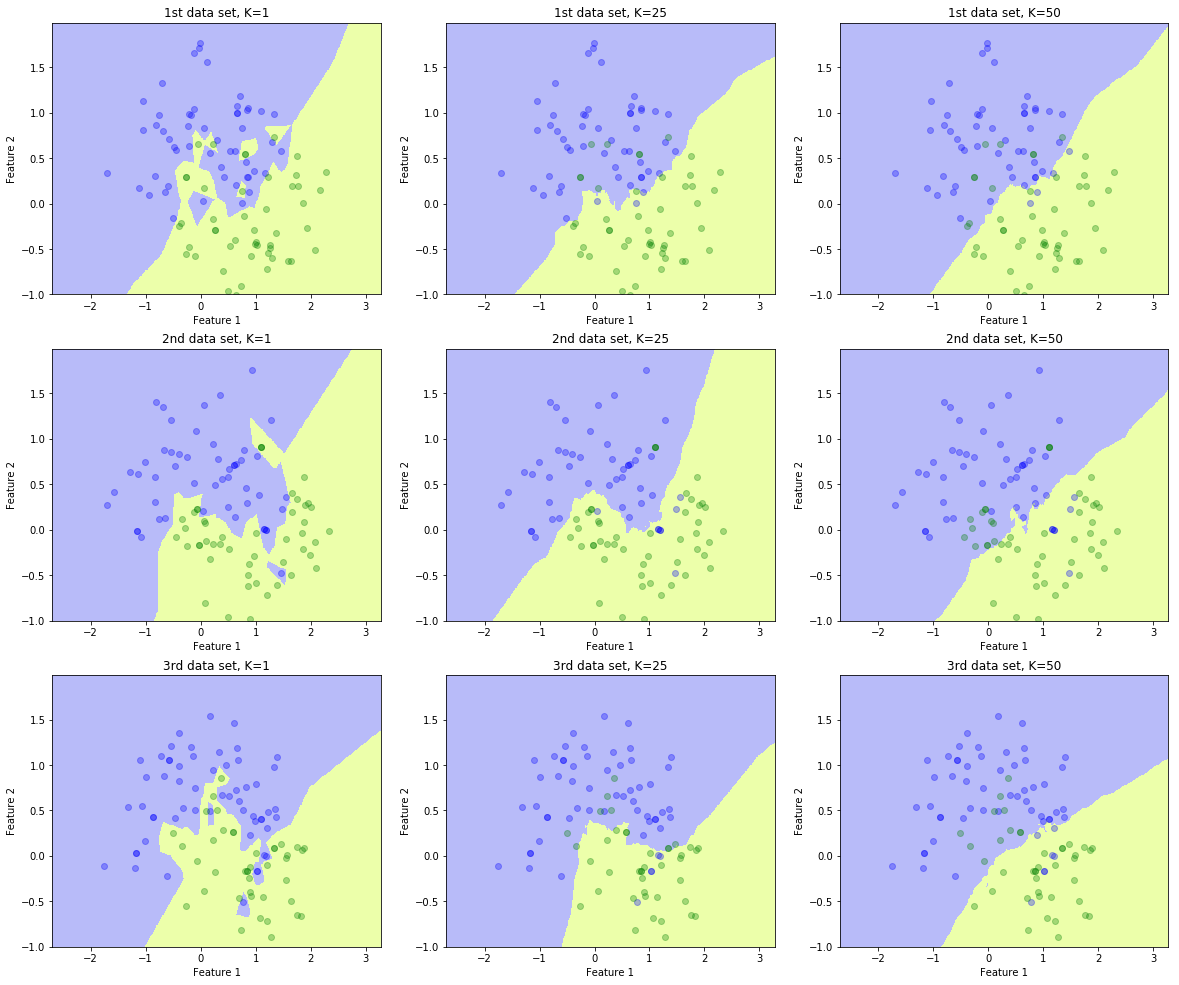

In [40]:
#(d)
from matplotlib.colors import ListedColormap
meshCmap = ListedColormap(['#b8bbf9', '#d2f7d2', '#ecffaa'])

plt.figure(figsize=(20,17))
x_min, x_max = subset_1_x[:,0].min()-1, subset_1_x[:,0].max()+1
y_min, y_max = subset_1_y.min()-1, subset_1_y.max()+1
meshStep = 0.01 # Define mesh step
xx, yy = np.meshgrid(np.arange(x_min, x_max, meshStep), np.arange(y_min, y_max, meshStep)) # Form mesh grid

def plot_boundary(X, Y, i, knn, k, title):
    plt.subplot(3,3,i)
    decision_boundary = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # Swipe the predictor over the range
    # Form color plot
    decision_boundary = decision_boundary.reshape(xx.shape)
    plt.pcolormesh(xx, yy, decision_boundary, cmap=meshCmap)
    # Plot data
    plt.scatter(X[Y==0,0],X[Y==0,1], color='blue', alpha=.3)
    plt.scatter(X[Y==1,0],X[Y==1,1], color='green', alpha=.3)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title +" data set, K={}".format(k))

plot_boundary(subset_1_x, subset_1_y, i=1, knn=knn1_1, k=1, title = '1st')
plot_boundary(subset_1_x, subset_1_y, i=2, knn=knn1_25, k=25, title = '1st')
plot_boundary(subset_1_x, subset_1_y, i=3, knn=knn1_50, k=50, title = '1st')
plot_boundary(subset_2_x, subset_2_y, i=4, knn=knn2_1, k=1, title = '2nd')
plot_boundary(subset_2_x, subset_2_y, i=5, knn=knn2_25, k=25, title = '2nd')
plot_boundary(subset_2_x, subset_2_y, i=6, knn=knn2_50, k=50, title = '2nd')
plot_boundary(subset_3_x, subset_3_y, i=7, knn=knn3_1, k=1, title = '3rd')
plot_boundary(subset_3_x, subset_3_y, i=8, knn=knn3_25, k=25, title = '3rd')
plot_boundary(subset_3_x, subset_3_y, i=9, knn=knn3_50, k=50, title = '3rd')


plt.show()

**(e)**
Whe seeing the plots in the same row but different columns, we can notice that the decision boundary becomes more linear as the K increases. When seeing the plots in the same columns but different rows, the decision boundaries are very similar even the datasets are different. 
k= 25 appears to be the best separator. For k=1, since it fits perfectly on training sets, implying an potential overfitting problem. Moreover, it cannot be generalized well on other datasets, eg test sets. For k = 50, it produces a high error rate. Therefore, after considering flexbility and generalization, k=25 should be the best separator to choose. 

**(f)** The bias-variance tradeoff is that When fitting a more flexible model, the bias tends to decrease while the variance to increase. And our goal is to minimize both bias and variance. From the plots above we can see when k=1, the decision boundaries are different across different subsets, implying a high variance and a low bias. For k=50, the boundaries don't change much across different subsets, referring to a low variance but a high bias. For k=25, it's a kind of balance between this two radical cases. It doesn't produce as much variance as k=1 and doesn't generate as much bias as k=50. Hence, we are likely to choose this one instead of the other two as the best separator.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [34]:
#(a)
train_set = dataset
test_set = make_moons(n_samples=1000, shuffle=True, noise=0.35, random_state=200)
test_set[0]

array([[-0.06122607, -0.54302046],
       [ 0.20823675,  1.37118299],
       [ 1.44121797, -1.00336032],
       ..., 
       [ 1.51779618, -0.23144062],
       [ 0.2300424 , -0.97562004],
       [ 1.31883817, -1.01177121]])

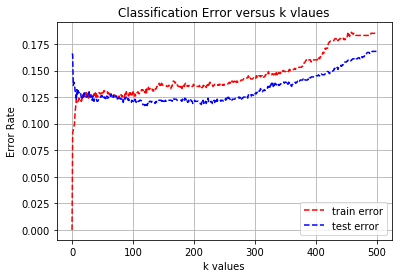

In [39]:
#(b)
train_error_rate = []
test_error_rate = []
for i in range(1,501):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(train_set[0],train_set[1])
    y_pred = knn.predict(train_set[0])
    train_error = 1 - accuracy(train_set[1], y_pred)
    train_error_rate.append(train_error)
    
    y_pred2 = knn.predict(test_set[0])
    test_error = 1 - accuracy(test_set[1], y_pred2)
    test_error_rate.append(test_error)
    
plt.plot(train_error_rate, 'r--')
plt.plot(test_error_rate, 'b--')
plt.xlabel("k values")
plt.ylabel("Error Rate")
plt.legend(["train error","test error"])
plt.title("Classification Error versus k vlaues")
plt.grid(True)
plt.show()

**(c)** From the left hand side of the plot, the train error rises up rapidly from k=0 to around k=10. As the k values in this range are very small, the model is more likely to be overfitting, so the test error rate is relatively low. On the other hand, since the model is overfitting and hard to generalize with small k values, we can observe that the test error starts from a high error rate of around 0.17 and drops rapidly as k increases. For k=11 to around k=70, the train error is approximately the same as the test error. It implies an optimal value for k in this range in the perspective of bias-variance tradeoff. For k >70, both test error and train error increase as k values increase because the model is over-generalized, producing a high bias. 

**(d)** For large k values, it produces high bias. For small k values, it produces high variances.

**(e)** The optimal value of k should fall in the range of 10 to around 70 because in this range test errors are almost the same as train errors. It indicates that the models with k values in this range are not overfitting nor over-generalized.

**(f)** Generally speaking, the number of predictors can control the flexibility. For example, for linear regression models, the number of predictors control the flexibility.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [43]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**

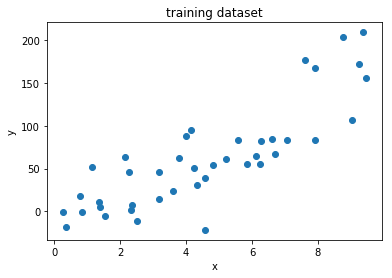

In [51]:
#(a)
plt.scatter(x_train, y_train)
plt.title("training dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [72]:
#(b)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train)

reg = LinearRegression().fit(x_train, y_train)
R_squared = reg.score(x_train, y_train) #R-squared

y_pred = reg.predict(x_train.reshape(-1, 1))
MSE = mean_squared_error(y_train, y_pred) #MSE

print("R-squared: {}".format(R_squared))
print("MSE: {}".format(MSE))
print("y = {} + {}x".format(reg.intercept_, reg.coef_[0]))

R-squared: 0.7014590913812251
MSE: 1052.5853662498014
y = -21.73078292905422 + 18.303206847693165x


In [120]:
#(c) Add a squared term 
#create new features
x_train = x_train
x_train_sq = np.square(x_train)
x_feature_new = np.hstack((x_train,x_train_sq))

reg2 = LinearRegression().fit(x_feature_new, y_train)
R_squared2 = reg2.score(x_feature_new, y_train)
y_pred2 = reg2.predict(x_feature_new)
MSE2 = mean_squared_error(y_train, y_pred2)

print("R-squared: {}".format(R_squared2))
print("MSE: {}".format(MSE2))
print("y = {} + {}x + {}x^2".format(reg2.intercept_, reg2.coef_[0], reg2.coef_[1]))

R-squared: 0.7490480719353505
MSE: 884.797759660905
y = 8.007337461589657 + 0.47100686043853707x + 1.8320819097372598x^2


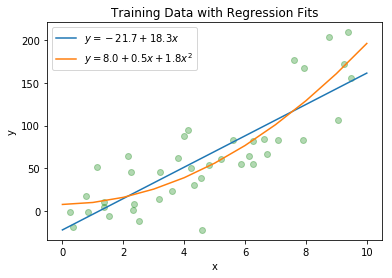

In [145]:
#(d)
x1 = np.array(range(int(np.round(min(x_train))[0]),int(np.round(max(x_train))[0])+2))
y1 = reg.intercept_ + reg.coef_[0]*x1

x2 = x1
y2 = reg2.intercept_ + reg2.coef_[0]*x2 + reg2.coef_[1]*x2**2

plt.scatter(x_train,y_train, color = 'green', alpha = 0.3)
plt.plot(x1,y1, label="$y = -21.7 + 18.3x$")
plt.plot(x2,y2, label="$y = 8.0 + 0.5x + 1.8x^2$")
plt.title("Training Data with Regression Fits")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [155]:
#(e)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test)

R_squared_test = reg.score(x_test, y_test) #R-squared
y_pred_test = reg.predict(x_test.reshape(-1, 1))
MSE_test = mean_squared_error(y_test, y_pred_test) #MSE

print("y=-21.7+18.3$")
print("R-squared: {}".format(R_squared_test))
print("MSE: {}".format(MSE_test))


x_test = x_test
x_test_sq = np.square(x_test)
x_feature_test = np.hstack((x_test,x_test_sq))

R_squared_test2 = reg2.score(x_feature_test, y_test) #R-squared
y_pred_test2 = reg2.predict(x_feature_test)
MSE_test2 = mean_squared_error(y_test, y_pred_test2) #MSE

print("y=8.0+0.5x+1.8x^2")
print("R-squared: {}".format(R_squared_test2))
print("MSE: {}".format(MSE_test2))

y=-21.7+18.3$
R-squared: 0.5556465885794163
MSE: 2023.3121088887128
y=8.0+0.5x+1.8x^2
R-squared: 0.6927820089560344
MSE: 1398.8817580143948


**( f )** <br>
For the training data, the MSE of the second model(884.80) is slightly lower than the first model(1052.59). For R-squared, the second model also generates a slightly higher (0.75) value than the first model (0.70). As a result, the second model performs better on the training set.
For the test data, the second model ($y=8.0+0.5x+1.8x^2$) produces a lower MSE and a higher R-squared. Therefore, it performs much better than the first one (the base model) on test set.

**(g)** If the new dataset is significant different from the current dataset, like different distributions. The model's predictive capability will worsen.